In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**#Loading data**

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


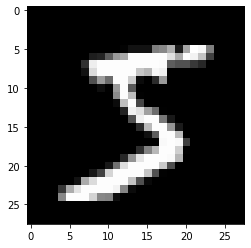

In [ ]:
plt.imshow(X_train[0], cmap="gray")

In [ ]:
plt.show()

In [ ]:
print (y_train[0])

5


In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


**# Reshaping so as to convert images for our model**

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


**#one hot encoding**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

**# Declare the layers**

In [ ]:
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

**# Add the layers to the model**

In [ ]:
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 81s 43ms/step - loss: 0.8323 - accuracy: 0.7962 - val_loss: 0.1152 - val_accuracy: 0.9658
Epoch 2/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2679 - accuracy: 0.9200 - val_loss: 0.0788 - val_accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2109 - accuracy: 0.9378 - val_loss: 0.0649 - val_accuracy: 0.9787


In [ ]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("loss & accuracy")
print(metrics)

loss & accuracy
[0.06487700343132019, 0.9786999821662903]


In [ ]:
prediction=model.predict(X_test[:4])
print(np.argmax(prediction,axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 187ms/step
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.save('digit-recognition.h5')

In [ ]:
!tar -zcvf digit-recognition.tar digit-recognition.h5

digit-recognition.h5


In [ ]:
!pip install ibm_watson_machine_learning
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 51 kB 694 kB/s 
     |████████████████████████████████| 824 kB 51.5 MB/s 
     |████████████████████████████████| 133 kB 58.9 MB/s 
     |████████████████████████████████| 547 kB 50.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72567 sha256=7f582557332068355cd7726c620115e860a6aec253d6a905bda8184fd430a981
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501011 sha256=42860c315d3aff6f7a18d2c59dd31499b46308029d68663d7f5451b52829aea6
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"3s71GhGAay6mKXDWofj2tQswtG0C4GsyZjv01-Qcgzor"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/7345edf8b0f749aa88f640651c8f3e41:0f5aeccf-4b2d-49d5-aac5-e3f98468d9df::',
      'guid': '0f5aeccf-4b2d-49d5-aac5-e3f98468d9df',
      'name': 'Watson Machine Learning-9a',
      'type': 'machine_learning'}],
    'description': 'A novel method for handwritten digit recognition system',
    'name': 'IBM - PNT 2022TMID39257',
    'scope': {'bss_account_id': '7345edf8b0f749aa88f640651c8f3e41'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'f0bd540d-60c2-4d06-a1ae-8112af24c692',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'd1a17e9b31aa4ae188d80236ea30a341',
        'api_key': '4FudlLScA2YUZ4qEDrPfsqGg0LLgBbUZLtAsbrUjyu7I',
        'secret_access_key': '3fb6866c3d553cecb2a0c126077d00c88ee2407323aafc90',
        'service_id': 'ServiceId-19722712-4044-4046-80f2-6acc3d7e5c2b'},
       'editor': {

In [ ]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = guid_space_name(client,'IBM - PNT 2022TMID39257')
space_uid

'2b4eb3b8-bf93-4465-80d1-6d2f3fa74986'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='digit-recognition.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model repo",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-24T01:29:56.021Z',
  'id': '7a2ca593-1867-478f-897e-f1172eba549b',
  'modified_at': '2022-11-24T01:30:00.584Z',
  'name': 'CNN Digit recognition model repo',
  'owner': 'IBMid-6640044ANA',
  'resource_key': '3f63315a-52cb-44b8-84fe-b60fe8975214',
  'space_id': '2b4eb3b8-bf93-4465-80d1-6d2f3fa74986'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'7a2ca593-1867-478f-897e-f1172eba549b'

In [ ]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/content/DigitRecog_IBM_model.tar.gz'